In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

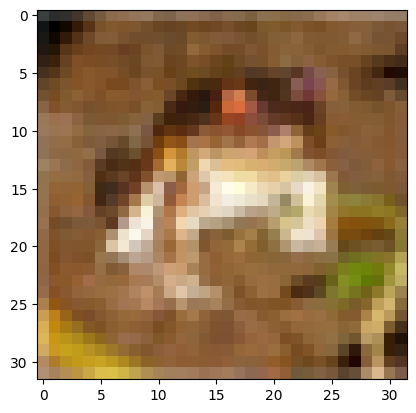

In [3]:
plt.imshow(X_train[0])
plt.show()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
#  CNN 신경망 설정

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), activation='relu'))  # 커널32개 사이즈 (3,3)
model.add(Conv2D(64, (3,3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))        # 풀링 사이즈 (2,2) ->50% 줄어듬
model.add(Dropout(0.25))                        # 노드를 25% 꺼줌 (계산 안함)

# Dense실행 -> 1차원으로 데이터차원 변경
model.add(Flatten())                      # (28,28,1) -> (28*28*1)
model.add(Dense(128, activation='relu'))  # 커널32개 사이즈 (3,3)
model.add(Dropout(0.5))                        # 노드를 50% 꺼줌 (계산 안함)
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [7]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_path = './data/model/cifar.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, batch_size=200, callbacks=[early_stopping, checkpointer])

print('test 정확도:', model.evaluate(X_test, y_test)[1])

Epoch 1/2000
188/188 [==============================] - ETA: 0s - loss: 1.3623 - accuracy: 0.5119
Epoch 1: val_loss improved from inf to 1.20850, saving model to ./data/model\cifar.hdf5
188/188 [==============================] - 92s 484ms/step - loss: 1.3623 - accuracy: 0.5119 - val_loss: 1.2085 - val_accuracy: 0.5793
Epoch 2/2000
188/188 [==============================] - ETA: 0s - loss: 1.2200 - accuracy: 0.5666
Epoch 2: val_loss improved from 1.20850 to 1.09582, saving model to ./data/model\cifar.hdf5
188/188 [==============================] - 91s 484ms/step - loss: 1.2200 - accuracy: 0.5666 - val_loss: 1.0958 - val_accuracy: 0.6137
Epoch 3/2000
116/188 [=================>............] - ETA: 32s - loss: 1.1404 - accuracy: 0.5964

KeyboardInterrupt: 

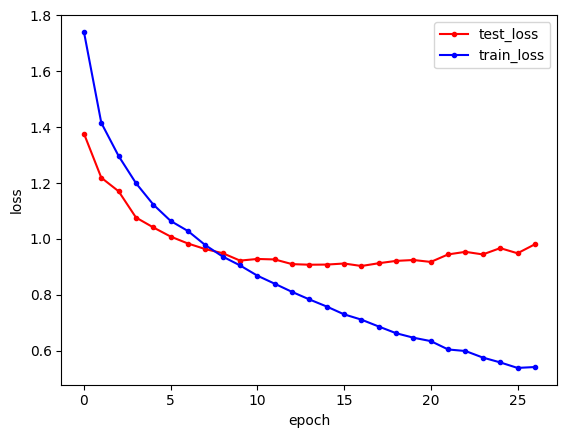

In [ ]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'r.-', label='test_loss')
plt.plot(x_len, y_loss, 'b.-', label='train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()